<a href="https://colab.research.google.com/github/salilathalye/chats-with-austin/blob/main/CWA_Travel_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn==0.23.1 --quiet
!pip install imblearn --quiet

     |████████████████████████████████| 6.9MB 5.9MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
insurance_data = pd.read_csv("https://github.com/dphi-official/Datasets/blob/master/travel_insurance/Training_set_label.csv?raw=true")

In [ ]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency Type           48260 non-null  object 
 2   Distribution Channel  48260 non-null  object 
 3   Product Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net Sales             48260 non-null  float64
 7   Commision (in value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


In [ ]:
insurance_data.describe()

,Duration,Net Sales,Commision (in value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


In [ ]:
insurance_data['Claim'].value_counts()

0    47552
1      708
Name: Claim, dtype: int64

In [ ]:
insurance_data.groupby(['Claim']).agg('mean')

,Duration,Net Sales,Commision (in value),Age
Claim,,,,
0,48.611983,39.931018,9.573973,39.945071
1,112.319209,95.595579,25.780749,38.731638


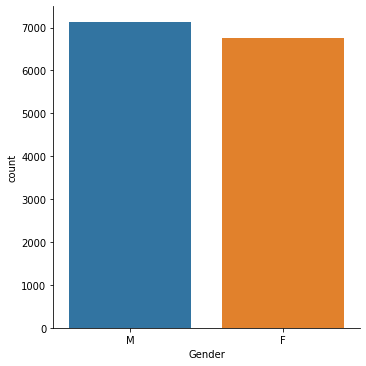

In [ ]:
sns.catplot(x='Gender', kind='count', data=insurance_data)

In [ ]:
insurance_data.drop(labels=['Claim'], axis=1).groupby(['Gender'], dropna=False).agg('mean')

,Duration,Net Sales,Commision (in value),Age
Gender,,,,
F,75.609583,59.577445,18.944117,43.045253
M,61.795292,56.008024,18.084174,46.435477
NaN,41.873461,33.872399,6.296308,37.961875


In [ ]:
insurance_data.groupby(['Gender'], dropna=False).agg({'Claim':'count'})

,Claim
Gender,
F,6762
M,7137
NaN,34361


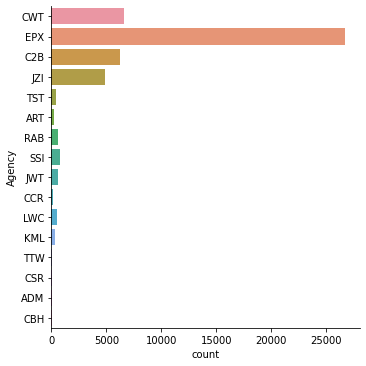

In [ ]:
sns.catplot(y='Agency', kind='count', data=insurance_data)

In [ ]:
insurance_data.drop(labels=['Claim'], axis=1).groupby(['Agency'], dropna=False).agg('mean')

,Duration,Net Sales,Commision (in value),Age
Agency,,,,
ADM,44.910714,54.946429,36.683571,22.964286
ART,31.713710,28.650242,10.560040,60.233871
C2B,95.756369,79.802704,20.753271,37.766879
CBH,90.328571,27.600000,9.890571,57.971429
CCR,63.541935,30.393548,10.215097,68.761290
CSR,84.000000,31.757576,10.480000,59.469697
CWT,41.978850,42.561564,32.165660,40.187310
EPX,39.289271,32.616652,0.000000,36.879492
JWT,27.170690,52.950000,21.656552,118.000000


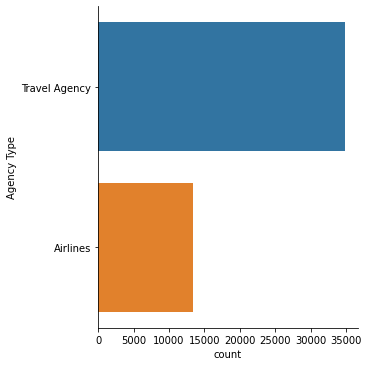

In [ ]:
sns.catplot(y='Agency Type', kind='count', data=insurance_data)

In [ ]:
insurance_data.drop(labels=['Claim'], axis=1).groupby(['Agency Type'], dropna=False).agg('mean')

,Duration,Net Sales,Commision (in value),Age
Agency Type,,,,
Airlines,68.123660,53.344001,15.606822,45.008169
Travel Agency,42.447662,35.934142,7.597230,37.985680


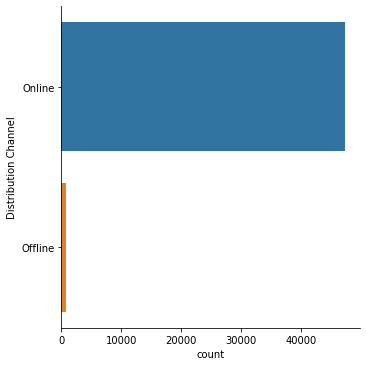

In [ ]:
sns.catplot(y='Distribution Channel', kind='count', data=insurance_data)

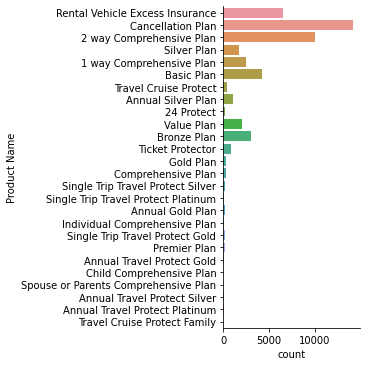

In [ ]:
sns.catplot(y='Product Name', kind='count', data=insurance_data)

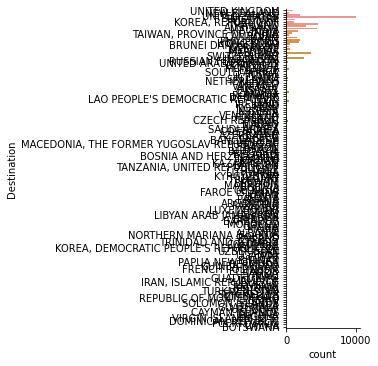

In [ ]:
sns.catplot(y='Destination', kind='count', data=insurance_data)

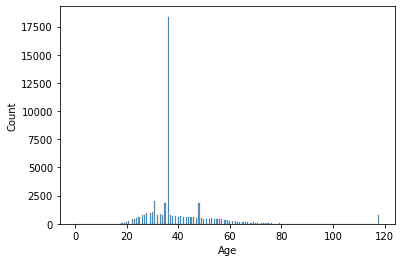

In [ ]:
sns.histplot(x='Age', data=insurance_data)

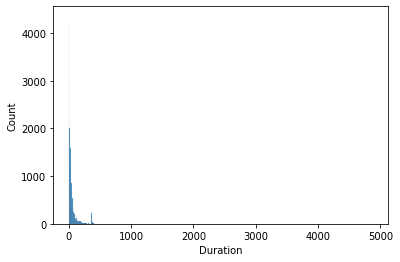

In [ ]:
sns.histplot(x='Duration', data=insurance_data)

In [ ]:
insurance_data_clean = insurance_data.copy(deep=True)

### Fill the missing values in 'Gender' column with 'Not Specified'

In [ ]:
values_fillna = {'Gender': 'Not Specified'}
insurance_data_clean.fillna(value=values_fillna, inplace=True)

In [ ]:
insurance_data_clean.groupby(['Gender'], dropna=False).agg({'Claim':'count'})

,Claim
Gender,
F,6762
M,7137
Not Specified,34361


### Drop 'Distribution Channel', 'Destination' and 'Agency Type'.


In [ ]:
insurance_data_clean.drop(labels=['Distribution Channel', 'Destination', 'Agency Type'], axis=1, inplace=True)

In [ ]:
insurance_data_clean.columns

Index(['Agency', 'Product Name', 'Duration', 'Net Sales',
       'Commision (in value)', 'Gender', 'Age', 'Claim'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')

In [ ]:
insurance_data_clean = pd.concat([insurance_data_clean, (pd.get_dummies(insurance_data_clean[['Agency', 'Gender', 'Product Name']],drop_first=True, sparse=False))], axis=1)

In [ ]:
insurance_data_clean.drop(labels=['Agency', 'Product Name', 'Gender'], axis=1, inplace=True)

In [ ]:
insurance_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 47 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Duration                                           48260 non-null  int64  
 1   Net Sales                                          48260 non-null  float64
 2   Commision (in value)                               48260 non-null  float64
 3   Age                                                48260 non-null  int64  
 4   Claim                                              48260 non-null  int64  
 5   Agency_ART                                         48260 non-null  uint8  
 6   Agency_C2B                                         48260 non-null  uint8  
 7   Agency_CBH                                         48260 non-null  uint8  
 8   Agency_CCR                                         48260 non-null  uint8  
 9   Agency

In [ ]:
from sklearn import preprocessing


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(insurance_data_clean.drop('Claim',axis=1), 
                                                    insurance_data_clean['Claim'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=25, sampling_strategy=1.0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train_res)
X_train_res_scaled = scaler.transform(X_train_res)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=2000, verbose=1)
lr.fit(X_train_res, y_train_res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.9s finished


LogisticRegression(max_iter=2000, verbose=1)

In [ ]:
lr_predictions = lr.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_predictions)

0.8172399502693742

In [ ]:
from sklearn.metrics import confusion_matrix
lr_confusion_matrix = confusion_matrix(y_test, lr_predictions)
print(lr_confusion_matrix)

[[11704  2579]
 [   67   128]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_predictions))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     14283
           1       0.05      0.66      0.09       195

    accuracy                           0.82     14478
   macro avg       0.52      0.74      0.49     14478
weighted avg       0.98      0.82      0.89     14478



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [ ]:
dt_predictions = dt.predict(X_test)
accuracy_score(y_test, dt_predictions)

0.9634618041165907

In [ ]:
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
print(dt_confusion_matrix)

[[13930   353]
 [  176    19]]


In [ ]:
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14283
           1       0.05      0.10      0.07       195

    accuracy                           0.96     14478
   macro avg       0.52      0.54      0.52     14478
weighted avg       0.97      0.96      0.97     14478



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [ ]:
rf_predictions = rf.predict(X_test)
accuracy_score(y_test, rf_predictions)

0.9742367730349496

In [ ]:
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print(rf_confusion_matrix)

[[14092   191]
 [  182    13]]


In [ ]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14283
           1       0.06      0.07      0.07       195

    accuracy                           0.97     14478
   macro avg       0.53      0.53      0.53     14478
weighted avg       0.97      0.97      0.97     14478

